# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
vehicle = pd.read_csv('/datasets/vehicles_us.csv')
vehicle.head(n=15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price` — harga kendaraan dalam USD
- `model_year` — tahun keluaran kendaraan
- `model` — model kendaraan
- `condition` — kondisi kendaraan
- `cylinders` — total silinder pada kendaraan
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — jenis transmisi
- `paint_color` — warna kenadaraan
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
vehicle.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
13074,1,2016.0,chevrolet camaro,excellent,10.0,gas,48223.0,other,coupe,silver,1.0,2019-02-21,35
40835,4250,2006.0,ford f-150,fair,6.0,gas,148014.0,manual,pickup,white,NaN,2018-09-20,13
27557,8900,2016.0,nissan versa,good,4.0,gas,77140.0,automatic,sedan,NaN,NaN,2018-06-09,29
32737,10995,NaN,chevrolet malibu,good,4.0,gas,52000.0,automatic,sedan,silver,NaN,2018-10-25,48
489,8995,2006.0,dodge dakota,like new,6.0,gas,50000.0,automatic,truck,black,NaN,2018-08-29,24
6228,24990,2015.0,ford f-250 sd,good,8.0,gas,43854.0,automatic,truck,NaN,1.0,2018-05-28,42
9805,13000,2005.0,jeep wrangler,excellent,6.0,gas,81000.0,automatic,offroad,white,1.0,2018-06-22,7
5966,21900,2013.0,chevrolet silverado 1500 crew,good,8.0,other,73779.0,other,pickup,red,1.0,2018-12-27,12
24441,17026,2013.0,toyota highlander,excellent,6.0,gas,149189.0,automatic,SUV,white,1.0,2019-02-18,42
13015,9000,2005.0,ram 1500,excellent,8.0,gas,126000.0,manual,pickup,white,1.0,2018-07-14,24




1. Dari vehicle.info() dapat dilihat ada data yang hilang
2. Dari vehicle.sample() terdapat missing value pada kolom `cylinders` dan `is_4wd`

---------------------


In [5]:
# Melihat apakah ada kolom dengan tipe data yang tidak sesuai
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


1. `model_year` : seharusnya jadi int karena tidak mungkin suatu tahun merupakan nilai yang berkoma
2. `cylinders` : alasannya sama seperti di atas
3. `is_4wd` : sepertinya bisa masuk ke tipe bool tapi tidak terlalu berpengaruh
4. `date_posted` : ini harus diganti menjadi tipe datetime agar mempermudah ketika diolah

---------------------


In [6]:
vehicle.duplicated().sum()

0

Berikut adalah kolom-kolom yang memiliki missing value
1. `model_year`
2. `cylinders`
3. `odometer`
4. `paint_color`
5. `is_4wd`

Kolom `is_4wd` memiliki missing value terbanyak. Mungkin ini bukan missing value, missing value tersebut mungkin merupakan `is_4wd` == False. Artinya value yang hilang berarti bukan 4wd.

---------------------

### Kesimpulan dan Langkah-Langkah Selanjutnya
1. Ada beberapa nilai `price` yang tidak normal, terdapat sekitar 800 baris yang berisi price <= 100
2. Selebihnya normal, hanya perlu dirapikan saja seperti pada kolom `is_4wd`

Langkah penyelesaian
1. Beberapa nilai yang tidak normal pada kolom price akan diganti atau di drop. Belum dapat dipastikan, akan dilakukan penelitian lanjut
2. Missing value pada kolom `is_4wd` akan ditinjau lagi, mungkin missing value ada yang benar-benar missing value bukan karena value tersebut missing karena `is_4wd = False`

---------------------


In [7]:
# Show dataframe header agar tidak perlu scroll ke atas
vehicle.head(n=15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [8]:
vehicle['price'].min()

1

In [9]:
# Mengecek ketidaknormalan pada kolom price

price_low = vehicle[vehicle['price'] == 1]
price_low

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [10]:
# Mengecek kolom is_4wd

vehicle['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [11]:
vehicle['days_listed'].min()

0

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [12]:
# Melihat kolom yang berisi missing value
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Seperti yang diketahui sebelumnya bahwa ada mobil dengan harga < 1000. Ini merupakan nilai yang tidak normal maka dengan itu baris yang <1000 akan di drop agar hasil penelitian lebih akurat

Hal ini dapat dikatakan tidak normal karena setelah saya survey beberapa website yang menjual mobil bekas di US, biasanya harga mobil bekas paling rendah dimulai pada 1000 US Dollar

In [13]:
vehicle = vehicle[vehicle['price'] >= 1000].reset_index(drop = True)

# Memfilter tabel dengan parameter price >= 1000

**Kolom price DONE**

-------------------

Jarak antara mean dan median pada kolom ini tidak terlalu jauh tetapi ada beberapa tahun yang berjarak terlalu jauh dari mean (1908) dan ini yang menjadi dasar keputusan saya untuk menggunakan median karena ada value yang terlalu jauh jaraknya dengan mean

Missing values pada kolom `model_year` akan diisi dengan median

In [14]:
vehicle['model_year'].median()

2011.0

In [15]:
vehicle['model_year'] = vehicle['model_year'].fillna(value = 2011)

**Kolom model_year DONE**

----------------

Selanjutnya saya akan mengisi missing value dari kolom `cylinders`. Prosedurnya yaitu dengan mengisi nilai median dari type mobil tersebut. Contoh jika mobilnya SUV maka akan diisi oleh nilai median dari `cylinders` type SUV

In [16]:
vehicle['cylinders'].median()

6.0

In [17]:
# Membuat fungsi untuk mengisi nilai yang hilang dengan median berdasarkan kolom lain

def fill_missing_total_income (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [18]:
vehicle = fill_missing_total_income(dataframe = vehicle, agg_column = 'type', value_column = 'cylinders')

**Kolom cylinders DONE**

----------------------------

Pada kolom `odometer` ini, nilai yang hilang akan diisi median dari `odometer` berdasarkan kolom `model_year`

In [19]:
vehicle = fill_missing_total_income(dataframe = vehicle, agg_column = 'model_year', value_column = 'odometer')

In [20]:


vehicle[vehicle['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
44383,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


Masih terdapat 1 baris yang berisi nilai hilang, hal ini terjadi karena `model_year` 1929 hanya terdapat satu baris saja jadi tidak ada median yang dapat di terapkan pada baris ini. Baris ini akan diisi median keseluruhan dataset

In [21]:
#vehicle['odometer'].isna() = vehicle['odometer'].median()
vehicle.loc[vehicle['model_year'] == 1929.0, 'odometer'] = vehicle['odometer'].median()

In [22]:
vehicle[vehicle['model_year'] == 1929.0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
44383,18000,1929.0,ford f-150,good,8.0,gas,116001.0,manual,other,silver,NaN,2018-11-18,59


**Kolom odometer DONE**

------------------------

Terdapat missing value pada kolom `paint_color`, tetapi kolom ini tidak masuk ke dalam parameter yang akan diamati pada project ini. Maka missing value pada kolom ini akan di ganti dengan 'other'

In [23]:
vehicle['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [24]:
vehicle['paint_color'] = vehicle['paint_color'].fillna(value = 'other')

**Kolom paint_color DONE**

----------------------

Pada kolom `is_4wd`, semua missing value akan diisi dengan nilai 0

In [25]:
vehicle['is_4wd'] = vehicle['is_4wd'].fillna(value = 0)

**Kolom is_4wd DONE**

-------------------------

In [26]:
# Mengecek hasil akhir

vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50121 entries, 0 to 50120
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50121 non-null  int64  
 1   model_year    50121 non-null  float64
 2   model         50121 non-null  object 
 3   condition     50121 non-null  object 
 4   cylinders     50121 non-null  float64
 5   fuel          50121 non-null  object 
 6   odometer      50121 non-null  float64
 7   transmission  50121 non-null  object 
 8   type          50121 non-null  object 
 9   paint_color   50121 non-null  object 
 10  is_4wd        50121 non-null  float64
 11  date_posted   50121 non-null  object 
 12  days_listed   50121 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.0+ MB


**Semua mising value telah ditangani**

-------------------------------

## Memperbaiki Tipe Data

In [27]:
# Mengubah tipe data pada kolom tertentu

vehicle['model_year'] = vehicle['model_year'].astype('int')
vehicle['cylinders'] = vehicle['cylinders'].astype('int')
vehicle['date_posted'] = pd.to_datetime(vehicle['date_posted'], format = '%Y-%m-%d')
vehicle['is_4wd'] = vehicle['is_4wd'].astype('int')

In [28]:
# Melihat tipe data kolom yang telah diupdate

vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50121 entries, 0 to 50120
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50121 non-null  int64         
 1   model_year    50121 non-null  int64         
 2   model         50121 non-null  object        
 3   condition     50121 non-null  object        
 4   cylinders     50121 non-null  int64         
 5   fuel          50121 non-null  object        
 6   odometer      50121 non-null  float64       
 7   transmission  50121 non-null  object        
 8   type          50121 non-null  object        
 9   paint_color   50121 non-null  object        
 10  is_4wd        50121 non-null  int64         
 11  date_posted   50121 non-null  datetime64[ns]
 12  days_listed   50121 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.0+ MB


In [29]:
# Melihat head pada dataframe

vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161248.5,automatic,pickup,other,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


**Tipe Data sudah disesuaikan**

----------------

## Memperbaiki Kualitas Data

In [30]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan

vehicle['day_of_week'] = vehicle['date_posted'].dt.day
vehicle['month'] = vehicle['date_posted'].dt.month
vehicle['year'] = vehicle['date_posted'].dt.year

Nilai waktu sudah ada pada kolom date_posted dan saya akan mengambil waktu dari kolom itu untuk menghitung umur kendaraan

In [31]:
# Membuat fungsi untuk menambahkan umur mobil

def tanggal (row):
    date_posted = row['date_posted']
    model_year = row['model_year']
    
    return date_posted.year - model_year

In [32]:
# Tambahkan usia kendaraan saat iklan ditayangkan
vehicle['car_age'] = vehicle.apply(tanggal, axis = 1)

In [33]:
# Membuat fungsi menghitung jarak tempuh rata-rata
def jarak_tempuh_tahunan (row):
    odometer = row['odometer']
    car_age = row['car_age']
    
    if odometer == 0:
        return odometer
    elif car_age == 0:
        return odometer
    else:
        return odometer/car_age

In [34]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
vehicle['odometer_yearly'] = vehicle.apply(jarak_tempuh_tahunan, axis = 1)

In [35]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
vehicle['condition'].replace('new', 5, inplace = True)
vehicle['condition'].replace('like new', 4, inplace = True)
vehicle['condition'].replace('excellent', 3, inplace = True)
vehicle['condition'].replace('good', 2, inplace = True)
vehicle['condition'].replace('fair', 1, inplace = True)
vehicle['condition'].replace('salvage', 0, inplace = True)

In [36]:
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,odometer_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161248.5,automatic,pickup,other,0,2019-03-22,9,22,3,2019,16,10078.031250
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000


## Memeriksa Data yang Sudah Bersih

In [37]:
# tampilkan informasi/rangkuman umum tentang DataFrame

vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50121 entries, 0 to 50120
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50121 non-null  int64         
 1   model_year       50121 non-null  int64         
 2   model            50121 non-null  object        
 3   condition        50121 non-null  int64         
 4   cylinders        50121 non-null  int64         
 5   fuel             50121 non-null  object        
 6   odometer         50121 non-null  float64       
 7   transmission     50121 non-null  object        
 8   type             50121 non-null  object        
 9   paint_color      50121 non-null  object        
 10  is_4wd           50121 non-null  int64         
 11  date_posted      50121 non-null  datetime64[ns]
 12  days_listed      50121 non-null  int64         
 13  day_of_week      50121 non-null  int64         
 14  month            50121 non-null  int64

In [38]:
# tampilkan sampel data 
vehicle.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,odometer_yearly
26407,14495,2012,ford explorer,3,6,gas,110846.5,automatic,SUV,green,1,2019-02-27,34,27,2,2019,7,15835.214286
26336,38000,2015,ram 3500,2,6,diesel,49000.0,automatic,pickup,white,1,2018-11-29,15,29,11,2018,3,16333.333333
10133,3500,2014,toyota rav4,3,4,gas,58000.0,automatic,SUV,other,0,2018-10-21,59,21,10,2018,4,14500.000000
42339,7500,2013,nissan altima,3,6,gas,140000.0,automatic,sedan,black,0,2018-06-26,11,26,6,2018,5,28000.000000
42477,7277,2014,toyota prius,3,4,hybrid,200332.0,automatic,hatchback,other,0,2019-01-15,72,15,1,2019,5,40066.400000
18689,11300,2012,buick enclave,3,6,gas,108774.0,automatic,SUV,white,1,2018-10-06,73,6,10,2018,6,18129.000000
45975,16504,2017,toyota camry,3,4,gas,72359.0,automatic,sedan,other,0,2018-08-07,52,7,8,2018,1,72359.000000
25334,5995,2012,ford escape,2,4,gas,147163.0,automatic,SUV,blue,0,2018-05-23,33,23,5,2018,6,24527.166667
36814,6995,2011,hyundai elantra,3,4,gas,96853.0,automatic,sedan,grey,0,2018-11-19,25,19,11,2018,7,13836.142857
23641,5500,2009,subaru impreza,2,4,gas,171556.0,automatic,sedan,silver,1,2018-07-07,34,7,7,2018,9,19061.777778


## Mempelajari Parameter Inti 


Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [39]:
# Membuat fungsi bar chart

def bar_chart(dataframe, column, judul='', labelx='', labely=''):

    fig = plt.figure()
    
    dataframe[column].value_counts().plot(kind='bar', figure = fig)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    
    return fig

In [40]:
# Membuat fungsi histogram

def histogram(dataframe, column, judul='', nbins= 20, labelx='', labely=''):
    
    fig = plt.figure()
 
    dataframe[column].plot(kind = 'hist', bins = nbins, title = judul)
    plt.xlabel(labelx)
    plt.ylabel(labely)

    return fig

Figure(432x288)


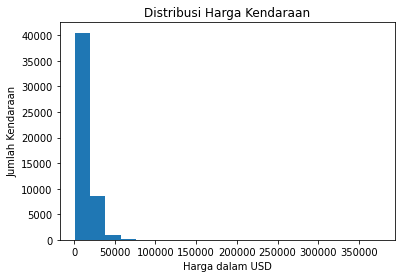

In [41]:
# Membuat histogram pada kolom price

print(histogram(dataframe= vehicle, column='price', judul='Distribusi Harga Kendaraan', nbins= 20,
               labelx = 'Harga dalam USD', labely= 'Jumlah Kendaraan'))

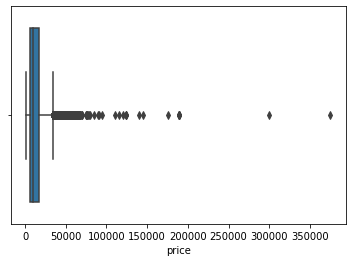

In [98]:
# Boxplot kolom price

sns.boxplot(data = vehicle, x='price');

Pada histogram kolom `price` dapat dilihat bahwa data berpusat di range 0 sampai 50000 dan pada boxplotnya dapat dilihat bahwa batas atas kolom ini sekitar 30000 dan semua angka diatasnya merupakan outlier

--------------------

Figure(432x288)


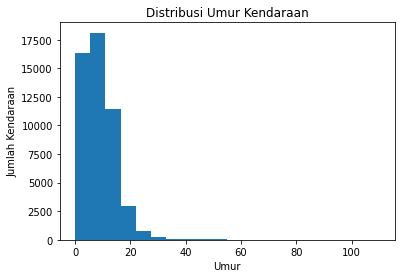

In [97]:
# Membuat histogram pada kolom car_age

print(histogram(dataframe= vehicle, column='car_age', judul='Distribusi Umur Kendaraan', nbins= 20,
               labelx = 'Umur', labely= 'Jumlah Kendaraan'))

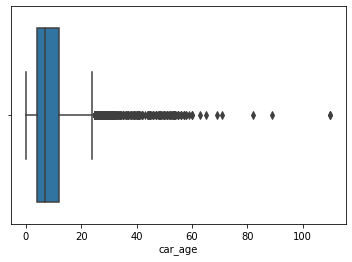

In [96]:
# Boxplot kolom car_age

sns.boxplot(data = vehicle, x='car_age');

Pada histogram kolom `car_age` dapat dilihat bahwa data berpusat di range 0 sampai 20 dan pada boxplotnya dapat dilihat bahwa batas atas kolom ini sekitar 24 dan semua angka diatasnya merupakan outlier

----------

Figure(432x288)


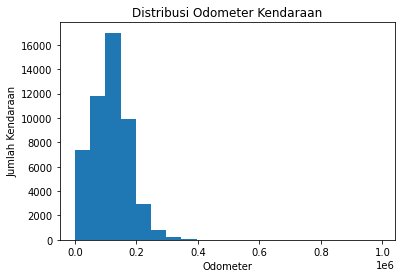

In [43]:
# Membuat histogram pada kolom odometer

print(histogram(dataframe= vehicle, column='odometer', judul='Distribusi Odometer Kendaraan', nbins= 20,
               labelx = 'Odometer', labely= 'Jumlah Kendaraan'))

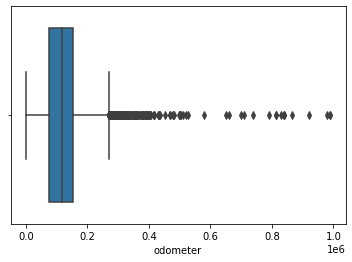

In [100]:
# Boxplot kolom odometer

sns.boxplot(data = vehicle, x='odometer');

Pada histogram kolom `odometer` dapat dilihat bahwa data berpusat di range 0 sampai 200000 satuan jarak dan pada boxplotnya dapat dilihat bahwa batas atas kolom ini di sekitar angka 250000 dan semua angka diatasnya merupakan outlier

----------

Figure(432x288)


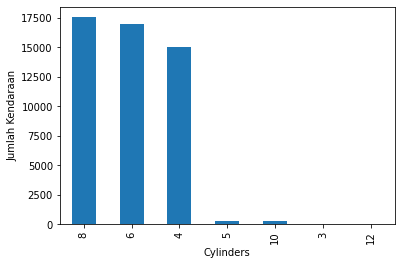

In [44]:
# Membuat bar chart pada kolom cylinders

print(bar_chart(dataframe= vehicle, column= 'cylinders', judul='Distribusi Silinder Kendaraan',
                labelx='Cylinders', labely='Jumlah Kendaraan'))

Pada histogram kolom `cylinders`, kategori 8 silinder merupakan kategory terbanyak lalu di ikuti oleh kategori 6 dan 4 lalu sisa kategori lainnya tidak mencapai angka 2500 kendaraan yang bersilinder 5, 10, 3 ataupun 12 dan 12 silinder mempunyai data terkecil. Data ini tidak dibuatkan boxplot karena merupakan tipe data kategorikal

----------

Figure(432x288)


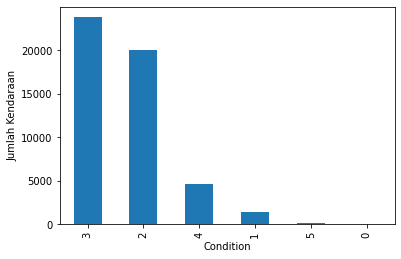

In [45]:
# Membuat bar chart pada kolom condition

print(bar_chart(dataframe= vehicle, column= 'condition', judul='Distribusi Kondisi Kendaraan',
                labelx='Condition', labely='Jumlah Kendaraan'))

Pada histogram kolom `condition`, kategori 3 merupakan kategory terbanyak lalu di ikuti oleh kategori 2 dan 4 lalu diikuti oleh condition 1, 5, 0 di peringkat 3 terakhir dengan kondisi 0 (salvage) sebagai kondisi dengan data paling sedikit. Data ini tidak dibuatkan boxplot karena merupakan tipe data kategorikal

----------

## Mempelajari dan Menangani Outlier



In [46]:
# Tentukan batas atas & bawah outlier 

def outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return lower_bound, upper_bound

In [48]:
# Membuat variable untuk menampung batas atas dan bawah untuk setiap kolom yang diteliti

outlier_price = outliers(dataframe= vehicle, column= 'price')
outlier_car_age = outliers(dataframe= vehicle, column= 'car_age')
outlier_odometer = outliers(dataframe= vehicle, column= 'odometer')

In [49]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
# Menggunakan query dan apply semua variable diatas

vehicle_clean = vehicle.query('@outlier_price[0] <= price <= @outlier_price[1] and @outlier_car_age[0] <= car_age < @outlier_car_age[1] and @outlier_odometer[0] <= odometer <= @outlier_odometer[1]')
vehicle_clean.reset_index(drop= True, inplace = True)
vehicle_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46972 entries, 0 to 46971
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            46972 non-null  int64         
 1   model_year       46972 non-null  int64         
 2   model            46972 non-null  object        
 3   condition        46972 non-null  int64         
 4   cylinders        46972 non-null  int64         
 5   fuel             46972 non-null  object        
 6   odometer         46972 non-null  float64       
 7   transmission     46972 non-null  object        
 8   type             46972 non-null  object        
 9   paint_color      46972 non-null  object        
 10  is_4wd           46972 non-null  int64         
 11  date_posted      46972 non-null  datetime64[ns]
 12  days_listed      46972 non-null  int64         
 13  day_of_week      46972 non-null  int64         
 14  month            46972 non-null  int64

**Kolom `cylinders` dan `condition` tidak di cek outliernya karena merupakan variable kategorik**

In [50]:
vehicle_clean.head(n=5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,odometer_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161248.5,automatic,pickup,other,0,2019-03-22,9,22,3,2019,16,10078.031250
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000


## Mempelajari Parameter Inti Tanpa Outlier

Figure(432x288)


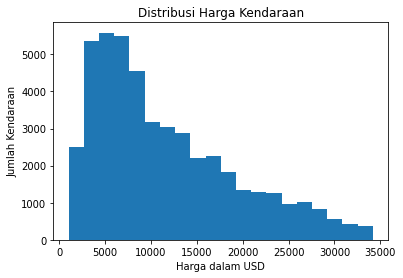

In [51]:
# Membuat histogram pada kolom price

print(histogram(dataframe= vehicle_clean, column='price', judul='Distribusi Harga Kendaraan', nbins= 20,
               labelx = 'Harga dalam USD', labely= 'Jumlah Kendaraan'))

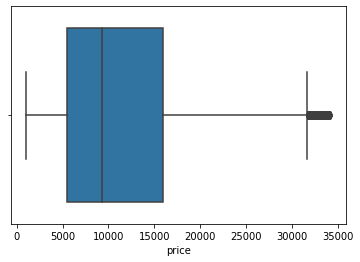

In [104]:
# Boxplot kolom price

sns.boxplot(data = vehicle_clean, x='price');

**Kesimpulan**

Range harga pada dataframe baru ini hanya berkisar dari 0 sampai 35000 USD. Berbeda pada dataframe sebelumnya dimana harga tersebut mencapai 350000 USD. Masih ada sedikit outlier dari data di atas tetapi tidak apa karena sebagian besar outlier telah dihilangkan

----------

Figure(432x288)


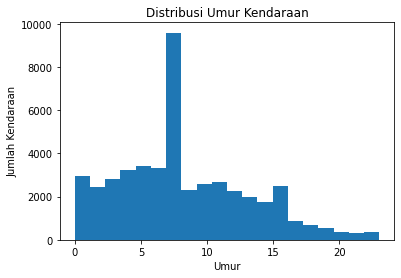

In [52]:
# Membuat histogram pada kolom car_age

print(histogram(dataframe= vehicle_clean, column='car_age', judul='Distribusi Umur Kendaraan', nbins= 20,
               labelx = 'Umur', labely= 'Jumlah Kendaraan'))

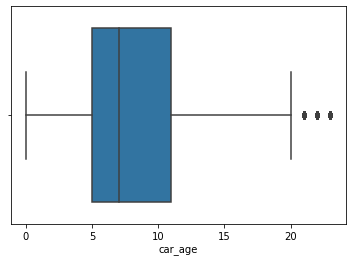

In [105]:
# Boxplot kolom car_age

sns.boxplot(data = vehicle_clean, x='car_age');

**Kesimpulan**

Angka tertinggi pada kolom umur mobil ini hanya sampai 20++ berbeda dengan graph dataframe yang berisi outlier. Masih ada sedikit outlier dari data di atas tetapi tidak apa karena sebagian besar outlier telah dihilangkan

--------------

Figure(432x288)


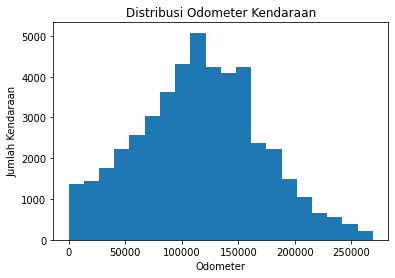

In [53]:
# Membuat histogram pada kolom odometer

print(histogram(dataframe= vehicle_clean, column='odometer', judul='Distribusi Odometer Kendaraan', nbins= 20,
               labelx = 'Odometer', labely= 'Jumlah Kendaraan'))

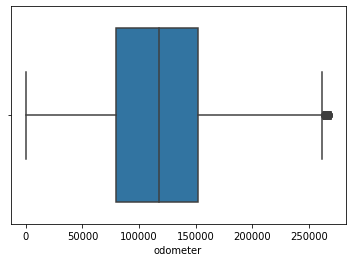

In [106]:
# Boxplot kolom odometer

sns.boxplot(data = vehicle_clean, x='odometer');

**Kesimpulan**

Pada graph dataframe yang berisi outlier kita dapat melihat bahwa data berpusat di sekitar 0 sampai 0.2x10^6 yang mana berarti 200000. Pada graph ini kita dapat melihat bahwa semua value yang di atas 269250 adalah outlier. Masih ada sedikit outlier dari data di atas tetapi tidak apa karena sebagian besar outlier telah dihilangkan

--------------------------

## Masa Berlaku Iklan 


In [54]:
print(vehicle_clean['days_listed'].mean())
print(vehicle_clean['days_listed'].median())
print(vehicle_clean['days_listed'].mode())

39.56931789150983
33.0
0    18
dtype: int64


In [55]:
vehicle_clean['days_listed'].describe()

count    46972.000000
mean        39.569318
std         28.235171
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Figure(432x288)


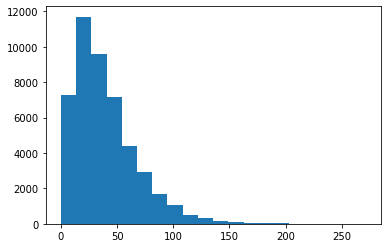

In [56]:
print(histogram(dataframe= vehicle_clean, column='days_listed'))

In [57]:
vehicle_clean.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,car_age,odometer_yearly
price,1.000000,0.564290,0.201426,0.349000,-0.496613,0.356676,-0.001694,-0.001358,-0.008468,0.006854,-0.562127,0.243473
model_year,0.564290,1.000000,0.252007,-0.169503,-0.590534,-0.033364,-0.001512,0.000677,-0.021510,0.018730,-0.995547,0.526736
condition,0.201426,0.252007,1.000000,-0.093605,-0.252036,-0.008958,0.001072,-0.012169,-0.005675,0.006490,-0.250718,0.066783
cylinders,0.349000,-0.169503,-0.093605,1.000000,0.149131,0.412745,0.002789,-0.005227,0.002632,-0.002942,0.168770,-0.043663
odometer,-0.496613,-0.590534,-0.252036,0.149131,1.000000,0.075606,0.003550,-0.002598,0.016069,-0.010546,0.587953,0.061826
is_4wd,0.356676,-0.033364,-0.008958,0.412745,0.075606,1.000000,0.003523,-0.002250,0.004158,-0.003668,0.032928,0.030141
days_listed,-0.001694,-0.001512,0.001072,0.002789,0.003550,0.003523,1.000000,-0.000083,-0.009737,0.009554,0.002408,-0.002705
day_of_week,-0.001358,0.000677,-0.012169,-0.005227,-0.002598,-0.002250,-0.000083,1.000000,0.031799,-0.061641,-0.006487,0.009594
month,-0.008468,-0.021510,-0.005675,0.002632,0.016069,0.004158,-0.009737,0.031799,1.000000,-0.817958,-0.055668,0.111846
year,0.006854,0.018730,0.006490,-0.002942,-0.010546,-0.003668,0.009554,-0.061641,-0.817958,1.000000,0.075604,-0.133575


**Kesimpulan**

Waktu rata-rata iklan ditanyangkan 39 hari dan mediannya 33 hari dan 271 hari adalah waktu terlama iklan ditayangkan

Dengan melihat korelasi pada tabel di atas, tidak ada satu variable yang mempengaruhi durasi `days_listed`

-------------------------------

## Harga Rata-Rata Setiap Jenis Kendaraan

In [58]:
vehicle_clean['type'].value_counts()

sedan          11613
SUV            11516
truck          10772
pickup          6242
coupe           1924
wagon           1479
mini-van        1133
hatchback        975
van              557
convertible      328
other            232
offroad          180
bus               21
Name: type, dtype: int64

In [59]:
# Menggunakan pivot_table untuk membuat table berisi tipe vehicle beserta harga rata-ratanya

vehicle_popular = vehicle_clean.pivot_table(index = 'type', values= ['price', 'model'], aggfunc = ('mean', 'count'))
vehicle_popular.columns = ['total_vehicle', 'avg_price']
vehicle_popular.sort_values(by = 'total_vehicle', ascending = False, inplace = True)
vehicle_popular['total_vehicle'] = vehicle_popular['total_vehicle'].astype('int')
vehicle_popular['avg_price'] = round(vehicle_popular['avg_price'], 2)

In [60]:
# Show pivot table

vehicle_popular

,total_vehicle,avg_price
type,,
sedan,11613,7210.78
SUV,11516,10728.04
truck,10772,15587.48
pickup,6242,15105.59
coupe,1924,14139.28
wagon,1479,9131.06
mini-van,1133,8130.41
hatchback,975,7040.75
van,557,9235.45


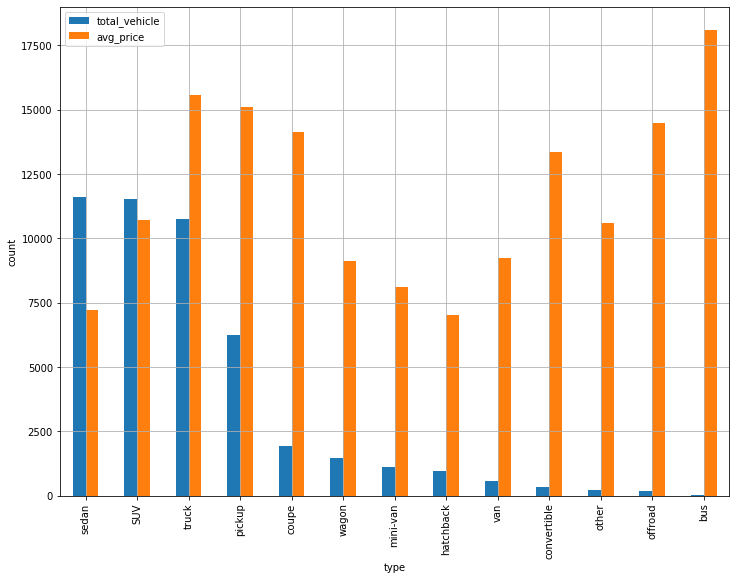

In [61]:
# Visualize menggunakan bar chart

vehicle_popular.plot(kind = 'bar', grid = True, figsize = (12,9));
plt.ylabel('count');

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Faktor Harga

### Faktor Harga Pada Sedan

In [62]:
# Mengambil sedan sebagai objek penelitian pertama

vehicle_sedan = vehicle_clean.query('type in "sedan"')

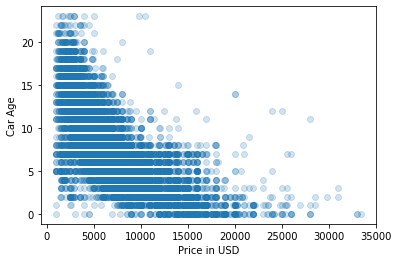

In [63]:
# Scatter plot harga dan umur kendaraan

plt.scatter(x = vehicle_sedan['price'], y= vehicle_sedan['car_age'], alpha= 0.2);
plt.xlabel('Price in USD');
plt.ylabel('Car Age');

Dari plot di atas dapat dilihat bahwa semakin kecil umur kendaraan maka dapat mencapai harga yang lebih tinggi

----------

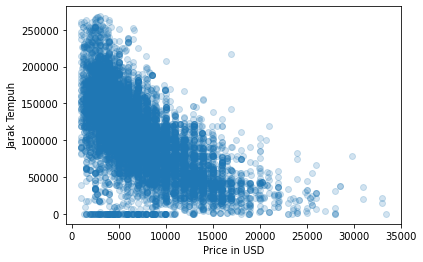

In [64]:
# Scatter plot harga dan jarak tempuh kendaraan

plt.scatter(x = vehicle_sedan['price'], y= vehicle_sedan['odometer'], alpha= 0.2);
plt.xlabel('Price in USD');
plt.ylabel('Jarak Tempuh');

Sama seperti plot sebelumnya, semakin sedikit jarak tempuh maka dapat mencapai harga yang lebih tinggi. Tidak selalu jarak tempuh yang kecil artinya harganya lebih tinggi tetapi jika jarak tempuhnya kecil ada kemungkinan harganya lebih tinggi

-------

In [65]:
# Mengecek apakah ada kategori yang di bawah nilai 50
vehicle_sedan['condition'].value_counts()

3    5838
2    4216
4    1270
1     213
5      43
0      33
Name: condition, dtype: int64

In [66]:
# Mensortir kategori yang di bawah nilai 50

list_condition = list(vehicle_sedan['condition'].value_counts()[:-2].index)
vehicle_sedan_condition = vehicle_sedan[vehicle_sedan['condition'].isin(list_condition)].reset_index(drop = True)

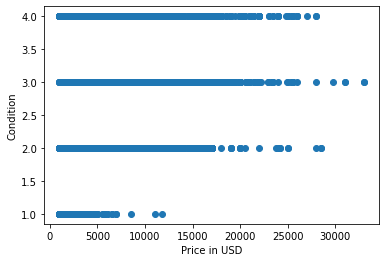

In [67]:
# Scatter plot condition terhadap harga kendaraan


plt.scatter(x = vehicle_sedan_condition['price'], y= vehicle_sedan_condition['condition']);
plt.xlabel('Price in USD');
plt.ylabel('Condition');

Tidak terdapat pola spesifik pada plot ini

------

In [68]:
# Mengecek apakah ada kategori yang di bawah nilai 50

vehicle_sedan['transmission'].value_counts()

automatic    10991
manual         548
other           74
Name: transmission, dtype: int64

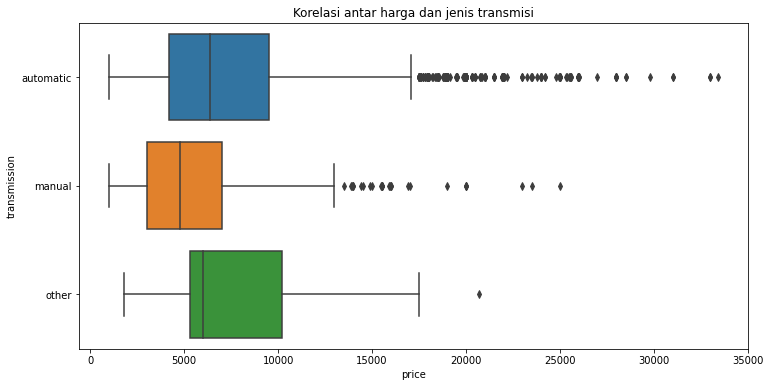

In [69]:
# Boxplot transmisi terhadap harga kendaraan
plt.figure(figsize= (12,6))
sns.boxplot(data= vehicle_sedan, x= 'price', y= 'transmission');
plt.title('Korelasi antar harga dan jenis transmisi');

Berdasarkan boxplot di atas

1. Batas bawah harga matic dan manual kurang lebih sama
2. Batas bawah harga transmisi other sedikit lebih di atas
3. Transmisi matic memiliki harga yang dapat melebihi transmisi manual dan other

------------------------------

In [70]:
# Mengecek apakah ada kategori yang di bawah nilai 50
vehicle_sedan['paint_color'].value_counts()

other     2070
silver    1982
black     1705
grey      1586
white     1433
blue      1185
red        890
custom     263
brown      251
green      198
purple      22
yellow      19
orange       9
Name: paint_color, dtype: int64

In [71]:
# Mensortir kategori yang di bawah nilai 50

list_color = list(vehicle_sedan['paint_color'].value_counts()[:-3].index)
vehicle_sedan_color = vehicle_sedan[vehicle_sedan['paint_color'].isin(list_color)].reset_index(drop = True)

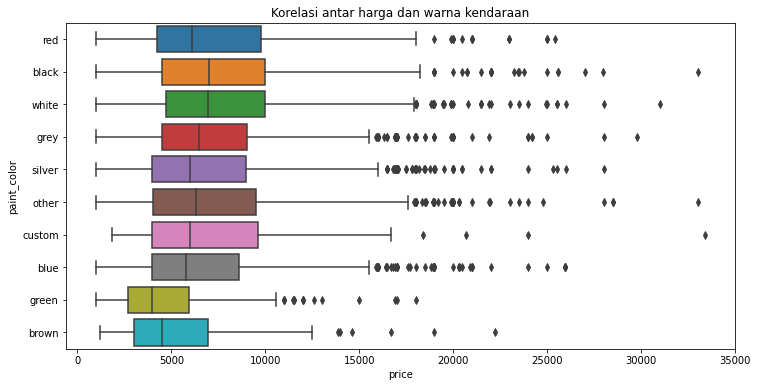

In [72]:
# Boxplot paint color terhadap harga kendaraan
plt.figure(figsize= (12,6))
sns.boxplot(data= vehicle_sedan_color, x= 'price', y= 'paint_color');
plt.title('Korelasi antar harga dan warna kendaraan');

Terdapat banyak kategori pada boxplot ini. Tetapi tidak ada warna spesifik yang membuat harga kendaraannya lebih tinggi daripada yang lain

-------------------------------------

In [73]:
# Koefisien korelasi
# Membuat dataframe baru yang hanya berisi kolom yang diteliti

vehicle_sedan_new = vehicle_sedan.drop(columns=['model_year', 'cylinders', 'is_4wd', 'days_listed', 'odometer_yearly'])
vehicle_sedan_new.corr()['price']

price          1.000000
condition      0.316307
odometer      -0.632945
day_of_week    0.004751
month         -0.016399
year           0.014312
car_age       -0.684392
Name: price, dtype: float64

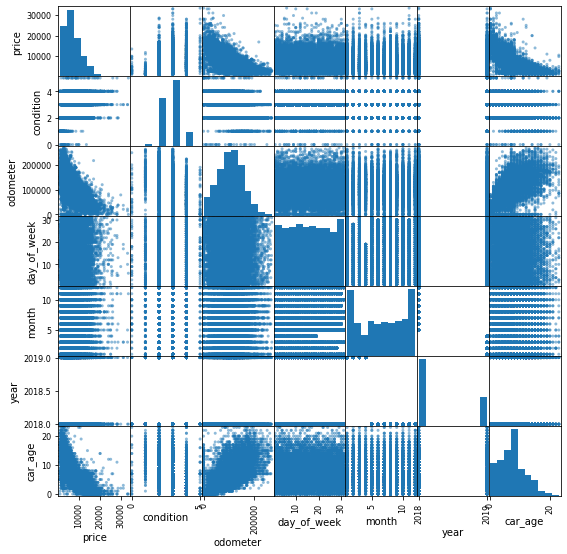

In [74]:
# Matrik korelasi

pd.plotting.scatter_matrix(vehicle_sedan_new, figsize=(9, 9));

Berdasarkan matriks korelasi

1. Harga kendaraan tidak terlalu berpengaruh dengan kondisinya (weak relation)
2. Harga kendaraan berbanding terbalik dengan umurnya (moderate relation)
3. Harga kendaraan berbanding terbalik dengan jarak tempuhnya (moderate relation)

-------

### Faktor Harga Pada SUV

In [75]:
# Mengambil sedan sebagai objek penelitian terakhir

vehicle_suv = vehicle_clean.query('type in "SUV"')

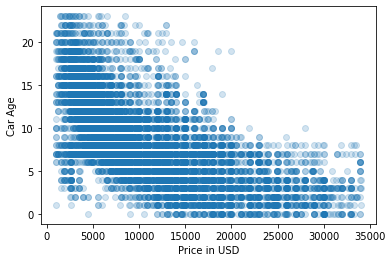

In [76]:
# Scatter plot harga dan umur kendaraan

plt.scatter(x = vehicle_suv['price'], y= vehicle_suv['car_age'], alpha= 0.2);
plt.xlabel('Price in USD');
plt.ylabel('Car Age');

Dari plot di atas dapat dilihat bahwa semakin kecil umur kendaraan maka dapat mencapai harga yang lebih tinggi

--------

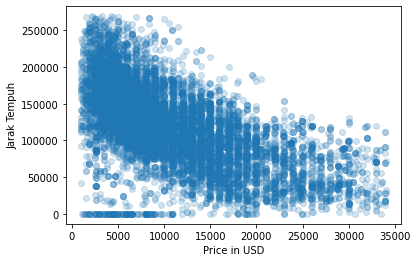

In [77]:
# Scatter plot harga dan jarak tempuh kendaraan

plt.scatter(x = vehicle_suv['price'], y= vehicle_suv['odometer'], alpha= 0.2);
plt.xlabel('Price in USD');
plt.ylabel('Jarak Tempuh');

Sama seperti plot sebelumnya, semakin sedikit jarak tempuh maka dapat mencapai harga yang lebih tinggi. Tidak selalu jarak tempuh yang kecil artinya harganya lebih tinggi tetapi jika jarak tempuhnya kecil ada kemungkinan harganya lebih tinggi

-----

In [78]:
# Mengecek apakah ada kategori yang di bawah nilai 50
vehicle_suv['condition'].value_counts()

3    6027
2    4167
4    1049
1     247
5      15
0      11
Name: condition, dtype: int64

In [79]:
# Mensortir kategori yang di bawah nilai 50

list_condition_suv = list(vehicle_suv['condition'].value_counts()[:-2].index)
vehicle_suv_condition = vehicle_suv[vehicle_suv['condition'].isin(list_condition_suv)].reset_index(drop = True)

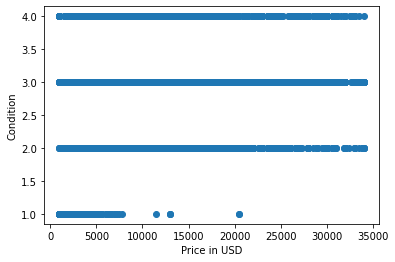

In [80]:
# Scatter plot condition terhadap harga kendaraan

plt.scatter(x = vehicle_suv_condition['price'], y= vehicle_suv_condition['condition']);
plt.xlabel('Price in USD');
plt.ylabel('Condition');

Tidak terdapat pola spesifik pada plot ini

------

In [81]:
# Mengecek apakah ada kategori yang di bawah nilai 50

vehicle_suv['transmission'].value_counts()

automatic    10970
manual         454
other           92
Name: transmission, dtype: int64

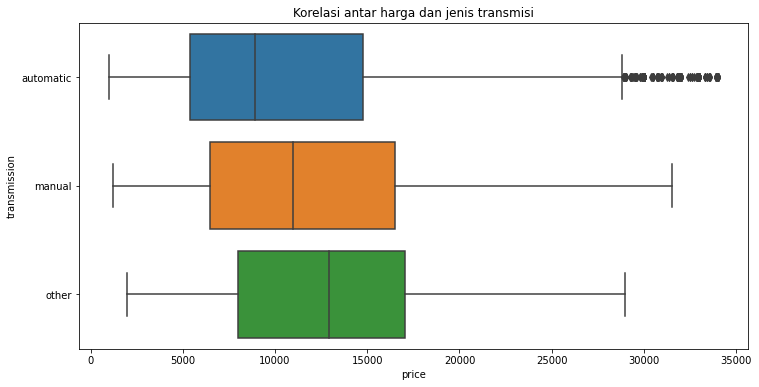

In [82]:
# Boxplot transmisi terhadap harga kendaraan
plt.figure(figsize= (12,6))
sns.boxplot(data= vehicle_suv, x= 'price', y= 'transmission');
plt.title('Korelasi antar harga dan jenis transmisi');

1. Quantile 0.50 dari transmisi other lebih besar daripada manual dan matic
2. Transmisi manual memiliki batas atas harga tertinggi

-----

In [83]:
# Mengecek apakah ada kategori yang di bawah nilai 50
vehicle_suv['paint_color'].value_counts()

other     2062
black     2002
white     1819
silver    1490
grey      1120
blue       982
red        852
green      405
brown      348
custom     273
orange      80
yellow      44
purple      39
Name: paint_color, dtype: int64

In [84]:
# Mensortir kategori yang di bawah nilai 50

list_color_suv = list(vehicle_suv['paint_color'].value_counts()[:-2].index)
vehicle_suv_color = vehicle_suv[vehicle_suv['paint_color'].isin(list_color_suv)].reset_index(drop = True)

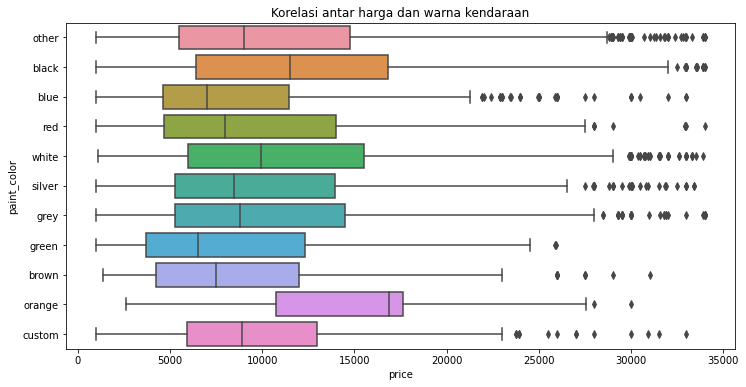

In [85]:
# Boxplot paint color terhadap harga kendaraan
plt.figure(figsize= (12,6))
sns.boxplot(data= vehicle_suv_color, x= 'price', y= 'paint_color');
plt.title('Korelasi antar harga dan warna kendaraan');

Terdapat banyak kategori pada boxplot ini. Tetapi tidak ada warna spesifik yang membuat harga kendaraannya lebih tinggi daripada yang lain

------------

In [86]:
# Koefisien korelasi
# Membuat dataframe baru yang hanya berisi kolom yang diteliti

vehicle_suv_new = vehicle_suv.drop(columns=['model_year', 'cylinders', 'is_4wd', 'days_listed', 'odometer_yearly'])
vehicle_suv_new.corr()['price']

price          1.000000
condition      0.288451
odometer      -0.612489
day_of_week   -0.000648
month         -0.008157
year           0.001734
car_age       -0.651296
Name: price, dtype: float64

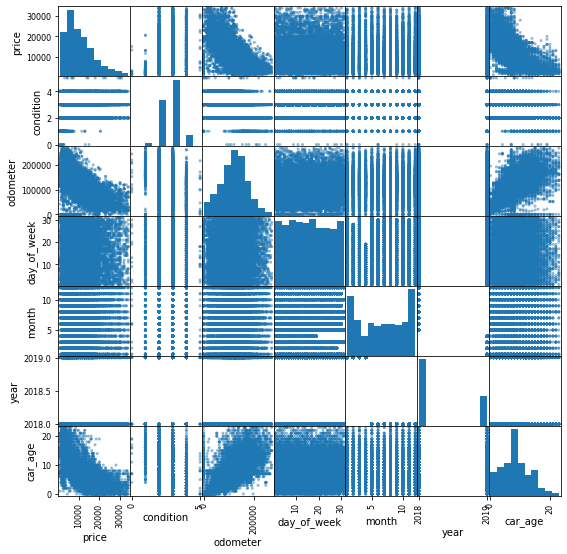

In [87]:
# Matrik korelasi

pd.plotting.scatter_matrix(vehicle_suv_new, figsize=(9, 9));

Berdasarkan matriks korelasi

1. Harga kendaraan tidak terlalu berpengaruh dengan kondisinya (weak relation)
2. Harga kendaraan berbanding terbalik dengan umurnya (moderate relation)
3. Harga kendaraan berbanding terbalik dengan jarak tempuhnya (moderate relation)

-------

## Kesimpulan Umum

### Pra pemrosesan data
1. Tidak ada nilai yang duplikat
2. Menghapus nilai `price` yang di bawah angka 1000 agar penelitian lebih presisi
3. Mengisi missing value pada kolom `model_year` dengan nilai mediannya
4. Mengisi missing value pada kolom `cylinders` dengan nilai mediannya
5. Mengisi missing value pada kolom `odometer` dengan nilai mediannya
5. Mengganti missing value pada kolom `paint_color` dengan 'other'
6. Mengganti missing value pada kolom `is_4wd` dengan nilai 0

### Memperbaiki Tipe Data
1. Mengubah kolom `model_year` menjadi int
2. Mengubah kolom `cylinders` menjadi int
3. Mengubah kolom `date_posted` menjadi datetime
4. Mengubah kolom `is_4wd` menjadi int

### Memperbaiki Kualitas Data
1. Menambahkan kolom umur kendaraan `car_age`
2. Menambahkan kolom jarak tempuh per-tahun kendaraan `odometer_yearly`
3. Mengubah tipe data dari kolom `condition` menjadi nilai 1 sampai 5

### EDA
1. Memvisualisasikan data yang menjadi parameter inti
2. Mengecek dan menangani outlier pada parameter inti tersebut
3. Membuat dataframe baru yang tidak mengikutsertakan outlier

**Mempelajari kolom `days_listed`**

Melihat waktu rata-rata dan lainnya lalu menyimpulkan bahwa umumnya sebuah iklan ditayangkan sekitar 33 hari dan tidak ada satu variable dari dataframe yang mempengaruhi durasi dari `days_listed`.

**Menganalisa faktor `price`**

Hasil analisa pada sedan dan SUV menghasilkan hasil yang mirip, yaitu:
1. Harga kendaraan tidak terlalu berpengaruh pada `condition`
2. Harga kendaraan berbanding terbalik dengan `car_age` (moderate relation)
Harga kendaraan berbanding terbalik dengan `odometer` (moderate relation)

Pada sedan, batas bawah harga transmisi other sedikit lebih di atas dan transmisi matic memiliki harga yang dapat melebihi transmisi manual dan other. Sedangkan pada SUV, Quantile 0.50 dari transmisi other lebih besar daripada manual dan matic tetapi transmisi manual memiliki batas atas harga tertinggi.

Untuk kategori `paint_color`, tidak ada warna spesifik yang membuat harga kendaraannya lebih tinggi daripada yang lain pada dua kendaraan ini. Hanya saja warna hitam merupakan kategori warna dengan batas atas harga tertinggi pada kedua kendaraan ini.

----------------------------

**Project Akhir Sprint 3 v.1 DONE**